# suggested plots

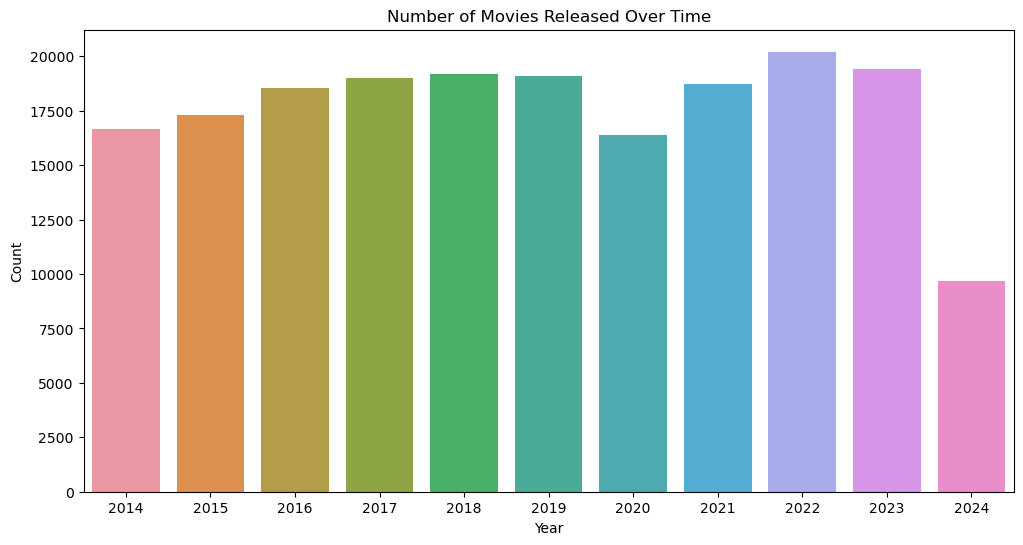

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='start_year', data=movies_df)
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


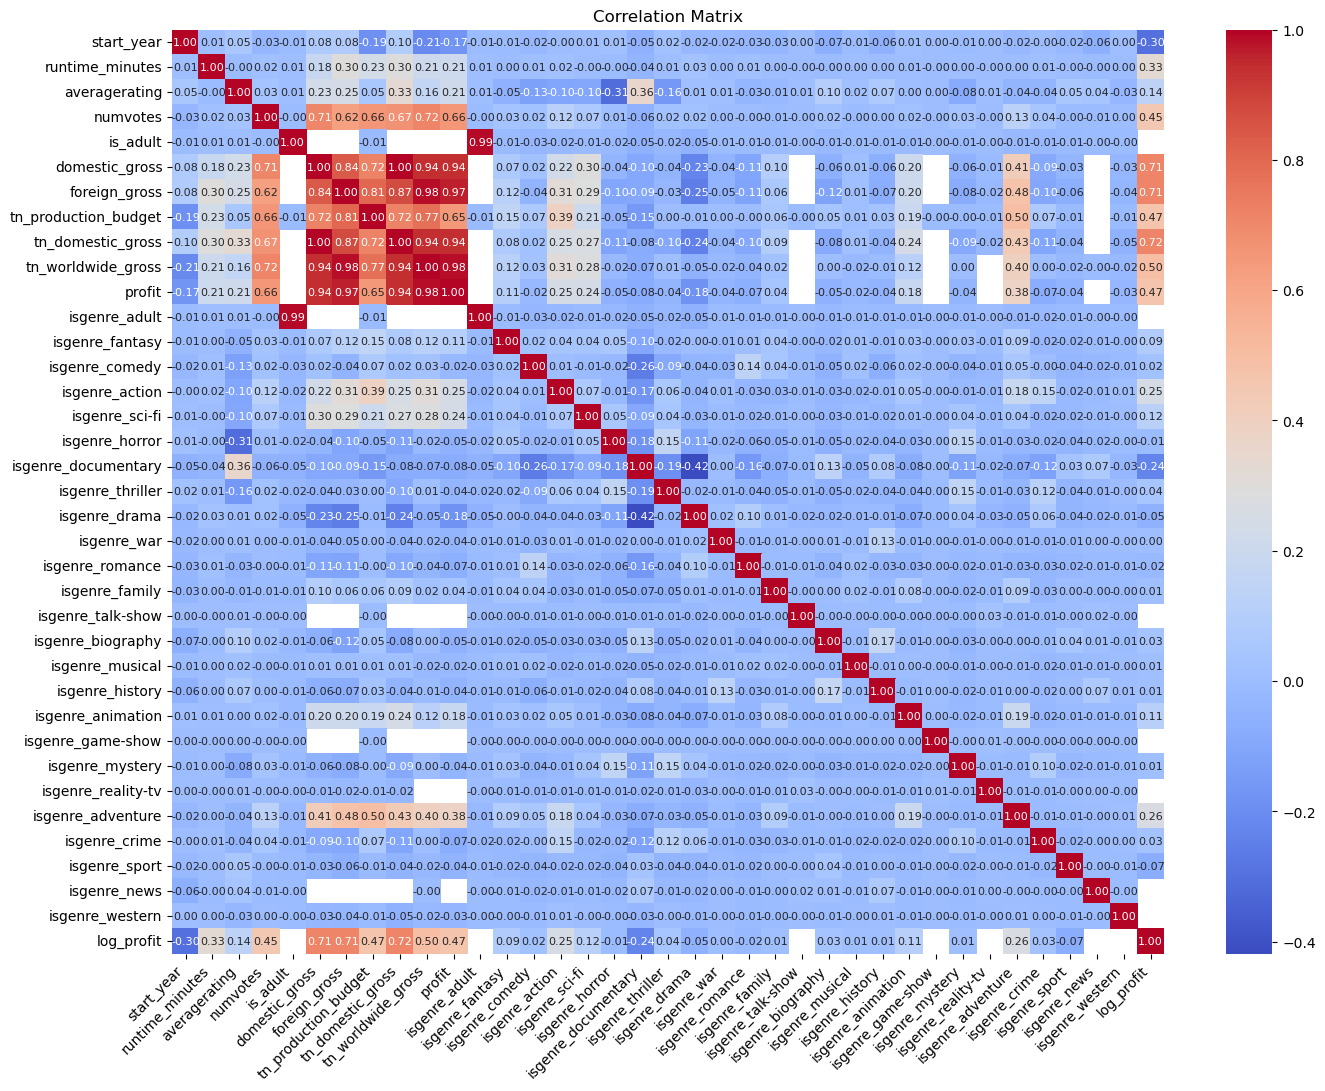

In [ ]:
plt.figure(figsize=(16, 12))  # Increase the figure size
sns.heatmap(movies_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})  # Adjust annotation font size
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure y-axis labels are not rotated
plt.show()


In [ ]:
display(movies_df.describe())


,start_year,runtime_minutes,averagerating,numvotes,is_adult,domestic_gross,foreign_gross,tn_production_budget,tn_domestic_gross,tn_worldwide_gross,profit
count,194180.00,145355.00,101899.00,101899.00,194180.00,1379.00,1040.00,846.00,846.00,846.00,769.00
mean,2018.87,91.18,6.29,3150.34,0.01,39296589.68,84606632.00,44580512.00,59210504.00,150622320.00,117530688.00
std,3.03,212.47,1.55,29210.05,0.08,78542651.96,155444624.00,55497420.00,92438232.00,255263584.00,220850112.00
min,2014.00,1.00,1.00,5.00,0.00,0.00,0.00,7000.00,0.00,0.00,-106900000.00
25%,2016.00,73.00,5.30,18.00,0.00,231500.00,1877044.00,7625000.00,3366269.00,7241309.00,303792.00
50%,2019.00,90.00,6.40,65.00,0.00,5900000.00,18500000.00,21500000.00,27952988.00,50404824.00,33351496.00
75%,2022.00,103.00,7.40,355.00,0.00,44200000.00,83600000.00,58000000.00,67268832.00,161921728.00,124806432.00
max,2024.00,59460.00,10.00,2118433.00,1.00,700100000.00,1152000000.00,300000000.00,700059584.00,2048134144.00,1748134144.00


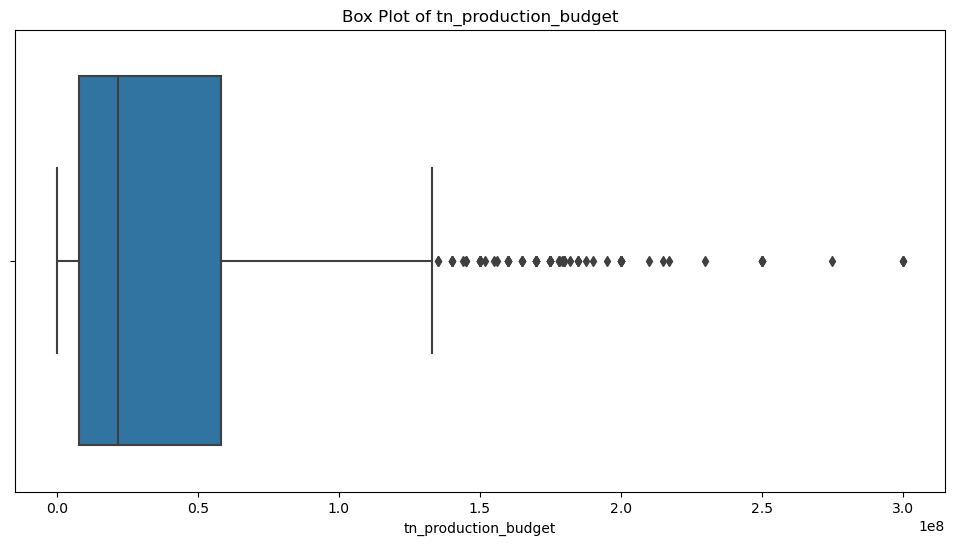

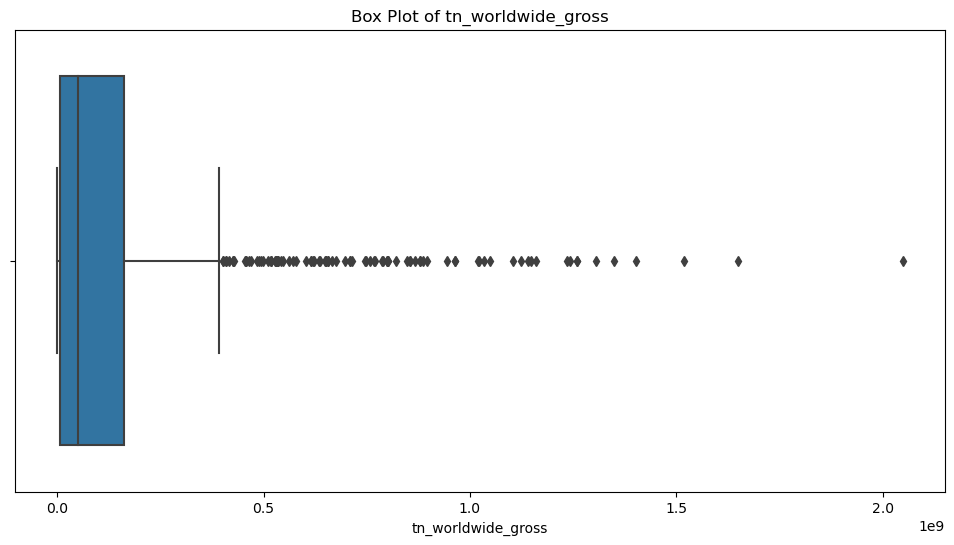

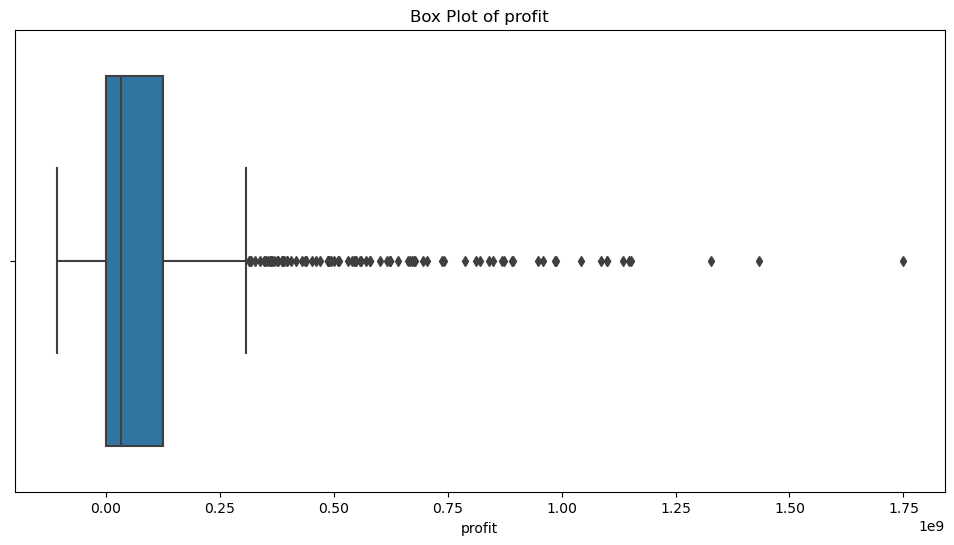

In [ ]:
# Function to plot box plots
def plot_box_plots(df, columns):
    for column in columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()

# Columns to plot
columns_to_plot = ['tn_production_budget', 'tn_worldwide_gross', 'profit']
plot_box_plots(movies_df, columns_to_plot)


In [ ]:

# Calculate total vote counts, weighted average ratings, total profits, and average profit for each genre
genre_metrics = {
    'Genre': [],
    'TotalVotes': [],
    'WeightedAverageRating': [],
    'TotalProfits': [],
    'AverageProfit': []
}

# List of genre columns
genre_columns = [col for col in movies_df.columns if col.startswith('isgenre_')]

for genre_col in genre_columns:
    genre_name = genre_col.replace('isgenre_', '')

    # Filter rows where this genre is True
    genre_df = movies_df[movies_df[genre_col]]

    # Calculate total votes
    total_votes = genre_df['numvotes'].sum()
    
    # Calculate weighted average rating
    if total_votes > 0:
        weighted_avg_rating = (genre_df['averagerating'] * genre_df['numvotes']).sum() / total_votes
    else:
        weighted_avg_rating = 0
    
    # Calculate total profits
    total_profits = genre_df['profit'].sum()
    
    # Calculate average profit
    num_movies = len(genre_df)
    if num_movies > 0:
        average_profit = total_profits / num_movies
    else:
        average_profit = 0

    # Append to metrics
    genre_metrics['Genre'].append(genre_name)
    genre_metrics['TotalVotes'].append(total_votes)
    genre_metrics['WeightedAverageRating'].append(weighted_avg_rating)
    genre_metrics['TotalProfits'].append(total_profits)
    genre_metrics['AverageProfit'].append(average_profit)

# Convert to DataFrame
genre_metrics_df = pd.DataFrame(genre_metrics)

# Scale the values for better readability
genre_metrics_df['TotalVotes'] = genre_metrics_df['TotalVotes'] / 1000  # to thousands
genre_metrics_df['TotalProfits'] = genre_metrics_df['TotalProfits'] / 1e6  # to millions
genre_metrics_df['AverageProfit'] = genre_metrics_df['AverageProfit'] / 1e3  # to millions


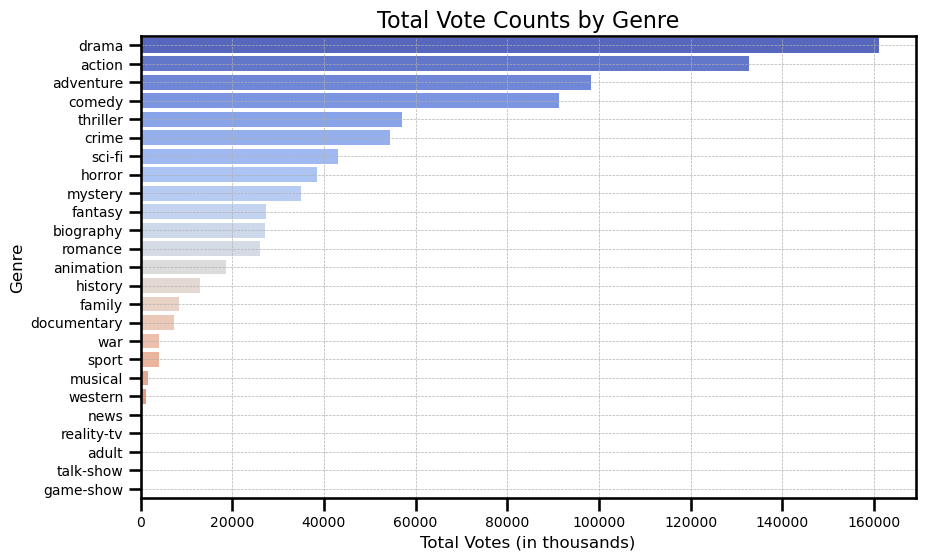

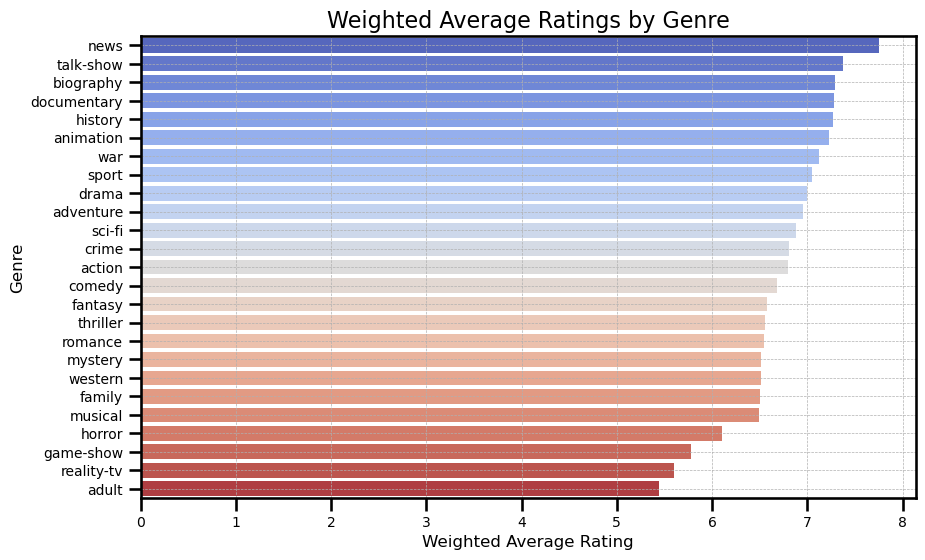

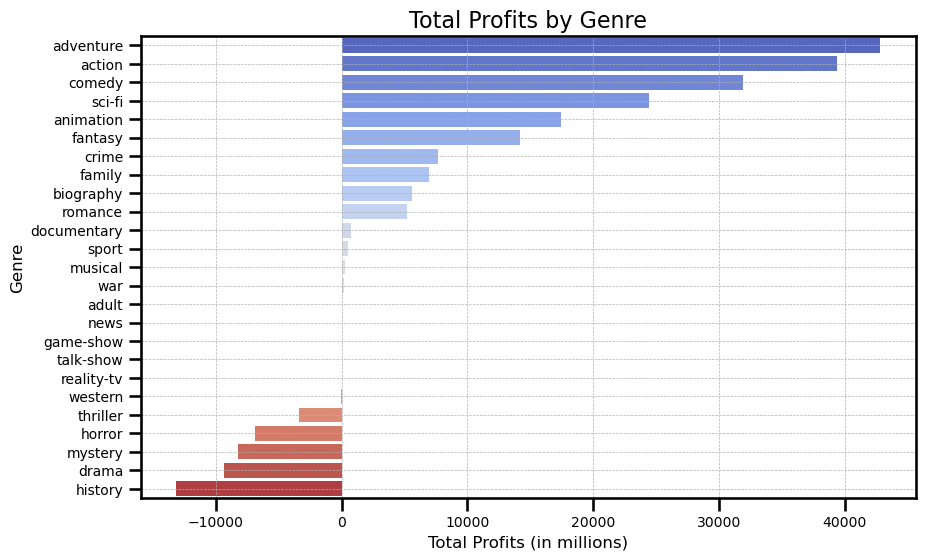

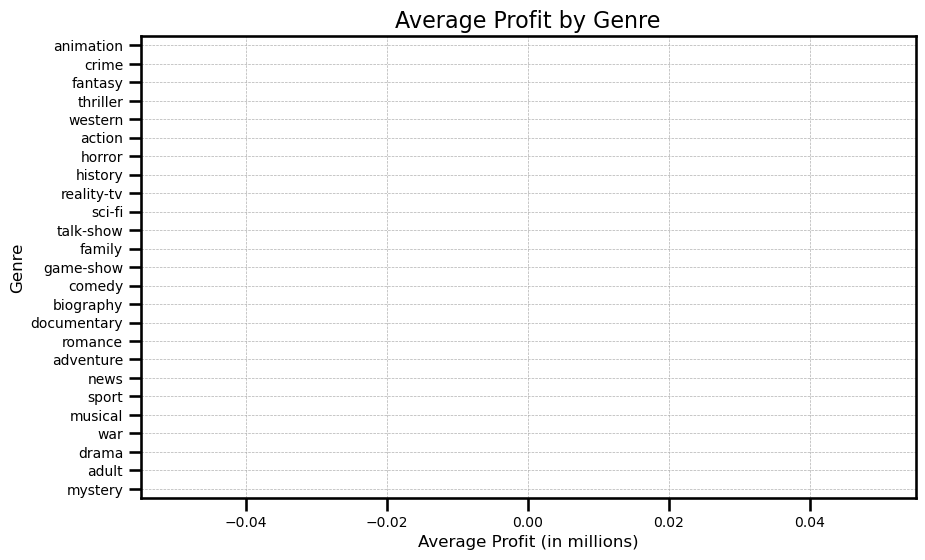

In [ ]:
# Create a color palette that spans from hot to cool
num_genres = len(genre_metrics_df)
hot_to_cool_palette = sns.color_palette("coolwarm", num_genres)

# Calculate Average Profit per Genre
genre_metrics_df['AverageProfit'] = genre_metrics_df['TotalProfits'] / movies_df[genre_columns].sum()

# Plot total vote counts by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalVotes', y='Genre', data=genre_metrics_df.sort_values(by='TotalVotes', ascending=False), palette=hot_to_cool_palette)
plt.title('Total Vote Counts by Genre', fontsize=16)
plt.xlabel('Total Votes (in thousands)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot weighted average ratings by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='WeightedAverageRating', y='Genre', data=genre_metrics_df.sort_values(by='WeightedAverageRating', ascending=False), palette=hot_to_cool_palette)
plt.title('Weighted Average Ratings by Genre', fontsize=16)
plt.xlabel('Weighted Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot total profits by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalProfits', y='Genre', data=genre_metrics_df.sort_values(by='TotalProfits', ascending=False), palette=hot_to_cool_palette)
plt.title('Total Profits by Genre', fontsize=16)
plt.xlabel('Total Profits (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot average profit per genre
plt.figure(figsize=(10, 6))
sns.barplot(x='AverageProfit', y='Genre', data=genre_metrics_df.sort_values(by='AverageProfit', ascending=False), palette=hot_to_cool_palette)
plt.title('Average Profit by Genre', fontsize=16)
plt.xlabel('Average Profit (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


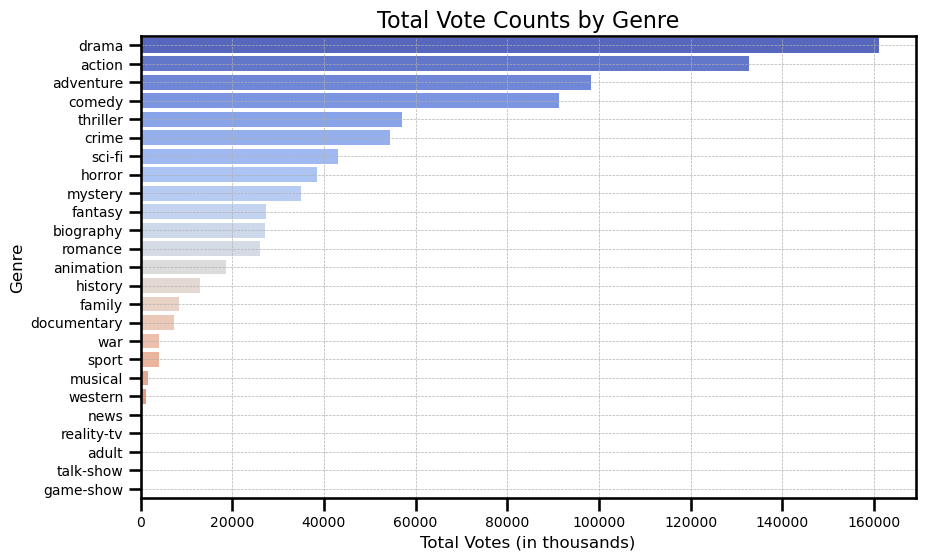

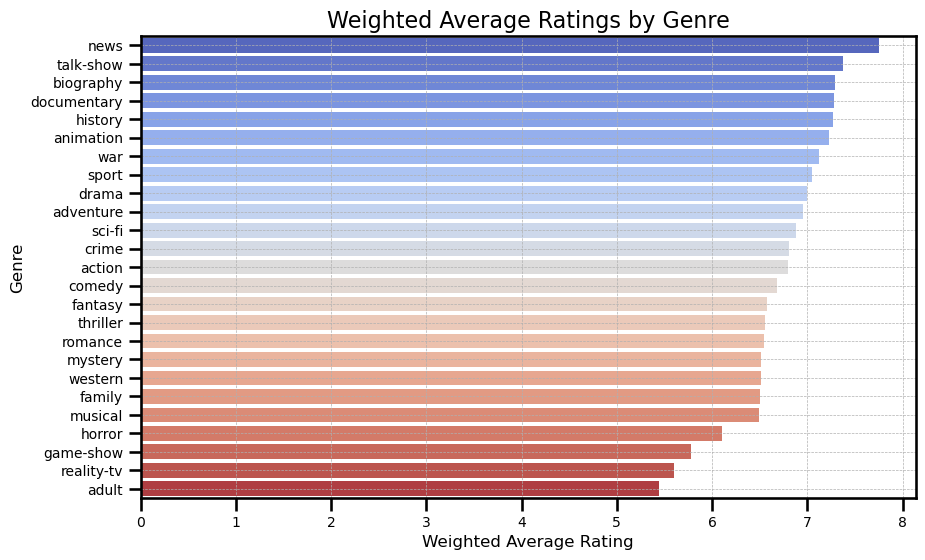

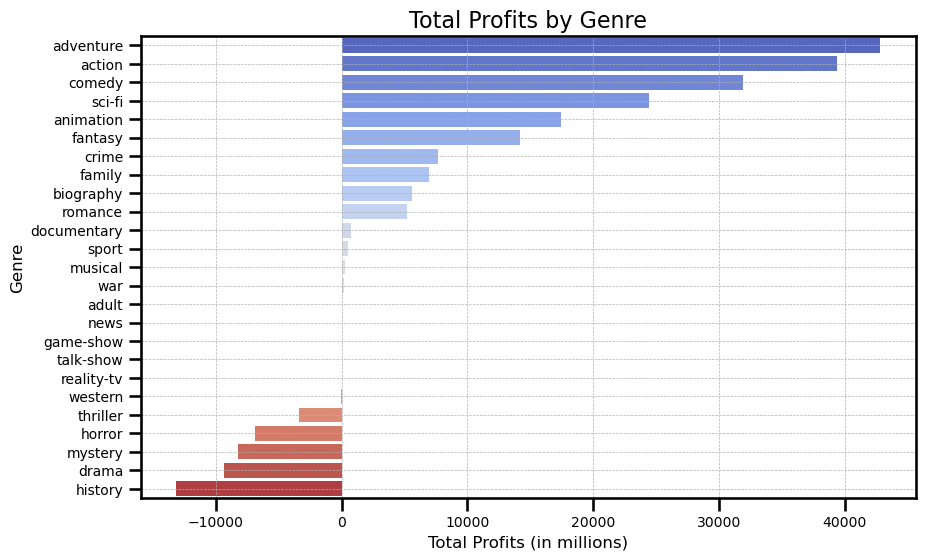

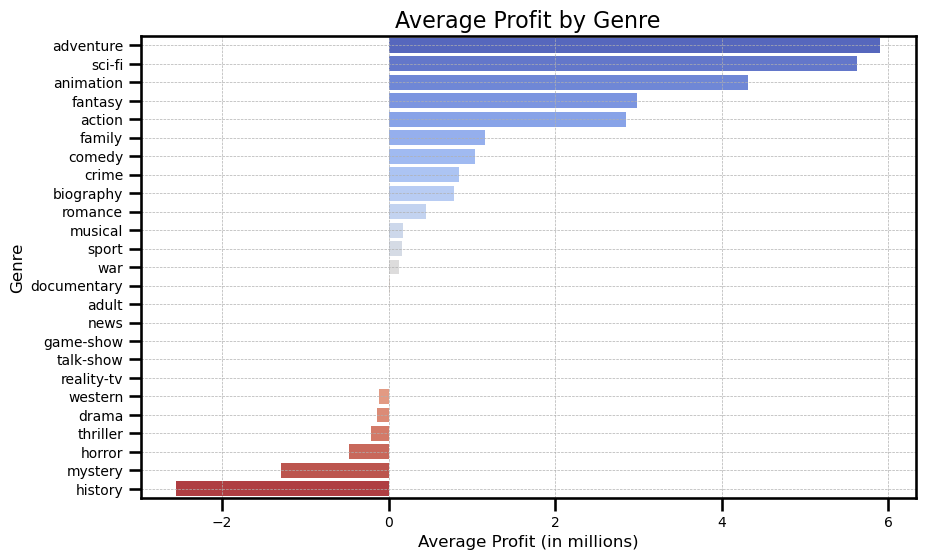

In [ ]:

# Calculate total vote counts, weighted average ratings, total profits, and average profit for each genre
genre_metrics = {
    'Genre': [],
    'TotalVotes': [],
    'WeightedAverageRating': [],
    'TotalProfits': [],
    'AverageProfit': []
}

# List of genre columns
genre_columns = [col for col in movies_df.columns if col.startswith('isgenre_')]

for genre_col in genre_columns:
    genre_name = genre_col.replace('isgenre_', '')

    # Filter rows where this genre is True
    genre_df = movies_df[movies_df[genre_col]]

    # Calculate total votes
    total_votes = genre_df['numvotes'].sum()
    
    # Calculate weighted average rating
    if total_votes > 0:
        weighted_avg_rating = (genre_df['averagerating'] * genre_df['numvotes']).sum() / total_votes
    else:
        weighted_avg_rating = 0
    
    # Calculate total profits
    total_profits = genre_df['profit'].sum()
    
    # Calculate average profit
    num_movies = len(genre_df)
    if num_movies > 0:
        average_profit = total_profits / num_movies
    else:
        average_profit = 0

    # Append to metrics
    genre_metrics['Genre'].append(genre_name)
    genre_metrics['TotalVotes'].append(total_votes)
    genre_metrics['WeightedAverageRating'].append(weighted_avg_rating)
    genre_metrics['TotalProfits'].append(total_profits)
    genre_metrics['AverageProfit'].append(average_profit)

# Convert to DataFrame
genre_metrics_df = pd.DataFrame(genre_metrics)

# Scale the values for better readability
genre_metrics_df['TotalVotes'] = genre_metrics_df['TotalVotes'] / 1000  # to thousands
genre_metrics_df['TotalProfits'] = genre_metrics_df['TotalProfits'] / 1e6  # to millions
genre_metrics_df['AverageProfit'] = genre_metrics_df['AverageProfit'] / 1e6  # to millions

# Create a color palette that spans from hot to cool
num_genres = len(genre_metrics_df)
hot_to_cool_palette = sns.color_palette("coolwarm", num_genres)

# Plot total vote counts by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalVotes', y='Genre', data=genre_metrics_df.sort_values(by='TotalVotes', ascending=False), palette=hot_to_cool_palette)
plt.title('Total Vote Counts by Genre', fontsize=16)
plt.xlabel('Total Votes (in thousands)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot weighted average ratings by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='WeightedAverageRating', y='Genre', data=genre_metrics_df.sort_values(by='WeightedAverageRating', ascending=False), palette=hot_to_cool_palette)
plt.title('Weighted Average Ratings by Genre', fontsize=16)
plt.xlabel('Weighted Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot total profits by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalProfits', y='Genre', data=genre_metrics_df.sort_values(by='TotalProfits', ascending=False), palette=hot_to_cool_palette)
plt.title('Total Profits by Genre', fontsize=16)
plt.xlabel('Total Profits (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot average profit by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='AverageProfit', y='Genre', data=genre_metrics_df.sort_values(by='AverageProfit', ascending=False), palette=hot_to_cool_palette)
plt.title('Average Profit by Genre', fontsize=16)
plt.xlabel('Average Profit (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
import pandas as pd
import sqlite3
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency

# Assume directors_df already contains director information
# Merge the director information with the movies_df DataFrame
movies_df_with_directors = pd.merge(movies_df, directors, on='movie_id', how='left')

# Create a copy of the DataFrame for the Chi-Square test
movies_df_copy = movies_df_with_directors.copy()

# Fill missing values in 'profit' with the mean of the column in the copied DataFrame
movies_df_copy['profit'] = movies_df_copy['profit'].fillna(movies_df_copy['profit'].mean())

# Verify that there are no missing values in the 'profit' column of the copy
missing_profits_copy = movies_df_copy['profit'].isnull().sum()
print(f"Number of missing values in 'profit' after filling in the copy: {missing_profits_copy}")

# Discretize profit into 3 categories: low, medium, high in the copied DataFrame
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
movies_df_copy['profit_category'] = discretizer.fit_transform(movies_df_copy[['profit']]).astype(int)

# Display the first few rows to check the profit categories in the copy
display(movies_df_copy[['movie_id', 'profit', 'profit_category']].head())

# Create contingency tables for actor1, actor2, and actor3 against profit categories in the copied DataFrame
contingency_actor1 = pd.crosstab(movies_df_copy['actor1'], movies_df_copy['profit_category'])
contingency_actor2 = pd.crosstab(movies_df_copy['actor2'], movies_df_copy['profit_category'])
contingency_actor3 = pd.crosstab(movies_df_copy['actor3'], movies_df_copy['profit_category'])

# Display the contingency tables
print("Contingency Table for Actor 1:\n", contingency_actor1.head())
print("Contingency Table for Actor 2:\n", contingency_actor2.head())
print("Contingency Table for Actor 3:\n", contingency_actor3.head())

# Perform Chi-Square test for actor1
chi2_actor1, p_actor1, dof_actor1, ex_actor1 = chi2_contingency(contingency_actor1)
print(f"Chi-Square Test for Actor 1: chi2={chi2_actor1}, p-value={p_actor1}")

# Perform Chi-Square test for actor2
chi2_actor2, p_actor2, dof_actor2, ex_actor2 = chi2_contingency(contingency_actor2)
print(f"Chi-Square Test for Actor 2: chi2={chi2_actor2}, p-value={p_actor2}")

# Perform Chi-Square test for actor3
chi2_actor3, p_actor3, dof_actor3, ex_actor3 = chi2_contingency(contingency_actor3)
print(f"Chi-Square Test for Actor 3: chi2={chi2_actor3}, p-value={p_actor3}")

# Create contingency tables for directors and profit categories in the copied DataFrame
contingency_director = pd.crosstab(movies_df_copy['person_id'], movies_df_copy['profit_category'])

# Display the contingency table
print("Contingency Table for Directors:\n", contingency_director.head())

# Perform Chi-Square test for directors
chi2_director, p_director, dof_director, ex_director = chi2_contingency(contingency_director)
print(f"Chi-Square Test for Directors: chi2={chi2_director}, p-value={p_director}")


Number of missing values in 'profit' after filling in the copy: 0


/home/atrix/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:216: FutureWarning: In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/atrix/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,movie_id,profit,profit_category
0,tt0011801,56370248.00,1
1,tt0013274,56370248.00,1
2,tt0062336,56370248.00,1
3,tt0069049,56370248.00,1
4,tt0070596,56370248.00,1


Contingency Table for Actor 1:
 profit_category               0  1
actor1                            
'Ganja' Karuppu               0  7
'Punnagai Poo' Geetha         0  1
1996 Olympic Water Polo Team  0  1
2Face Idibia                  0  1
A'Ali de Sousa                0  3
Contingency Table for Actor 2:
 profit_category               0  1
actor2                            
'Ganja' Karuppu               0  3
'Om' Rakesh Chaturvedi        0  1
'University' Jeevan           0  1
143 Anand                     0  1
2004 Olympic Water Polo Team  0  1
Contingency Table for Actor 3:
 profit_category          0  1
actor3                       
'Ganja' Karuppu          0  5
'Poo' Ram                0  1
'Punnagai Poo' Geetha    0  1
'Sushi' Xhyvette Holder  0  1
'Sushii' Xhyette Holder  0  1
Chi-Square Test for Actor 1: chi2=40165.621908722824, p-value=1.0
Chi-Square Test for Actor 2: chi2=42354.638795193714, p-value=1.0
Chi-Square Test for Actor 3: chi2=45667.920119432936, p-value=1.51969474

KeyError: 'person_id'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Convert boolean columns to numeric
movies_df = movies_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Filter numeric columns for PCA, including 'isgenre_' columns
numeric_cols = movies_df.select_dtypes(include=[np.number])

# Ensure columns to be excluded are in the dataframe
exclude_cols = ['movie_id', 'is_adult']
numeric_cols = numeric_cols.drop(columns=[col for col in exclude_cols if col in numeric_cols.columns])

# Handle missing values by filling with the mean of the column
numeric_cols = numeric_cols.fillna(numeric_cols.mean())

# Handle infinite values by replacing them with NaN and then filling them with the column mean
numeric_cols.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_cols = numeric_cols.fillna(numeric_cols.mean())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_cols)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Get the loadings (components)
loadings = pca.components_.T

# Calculate the importance of each feature
importance = np.sum(np.abs(loadings), axis=1)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': numeric_cols.columns,
    'Importance': importance
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Separate genre features from other features
genre_features = feature_importance[feature_importance['Feature'].str.startswith('isgenre_')]
other_features = feature_importance[~feature_importance['Feature'].str.startswith('isgenre_')]

# Rename genre features for readability
genre_features['Feature'] = genre_features['Feature'].str.replace('isgenre_', '').str.replace('_', ' ').str.title()

# Display the most important features
print("Most Important Features (Overall):")
print(feature_importance)

print("\nMost Important Genre Features:")
print(genre_features)

print("\nMost Important Non-Genre Features:")
print(other_features)



Most Important Features (Overall):
                 Feature  Importance
26     isgenre_animation        4.14
28        isgenre_family        4.08
25        isgenre_comedy        4.08
27         isgenre_crime        4.03
24        isgenre_sci-fi        3.96
0             start_year        3.90
2          averagerating        3.89
31           isgenre_war        3.87
13        isgenre_action        3.83
29        isgenre_horror        3.79
23       isgenre_fantasy        3.77
21       isgenre_mystery        3.74
18       isgenre_romance        3.71
20      isgenre_thriller        3.55
22     isgenre_biography        3.46
33            log_profit        3.44
14     isgenre_adventure        3.35
15       isgenre_history        3.31
32         isgenre_sport        3.15
11         isgenre_drama        3.15
1        runtime_minutes        2.72
30   isgenre_documentary        2.67
10     profit_proportion        2.64
19       isgenre_western        2.59
3               numvotes        2.57
12 

/tmp/ipykernel_160957/134152745.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_features['Feature'] = genre_features['Feature'].str.replace('isgenre_', '').str.replace('_', ' ').str.title()


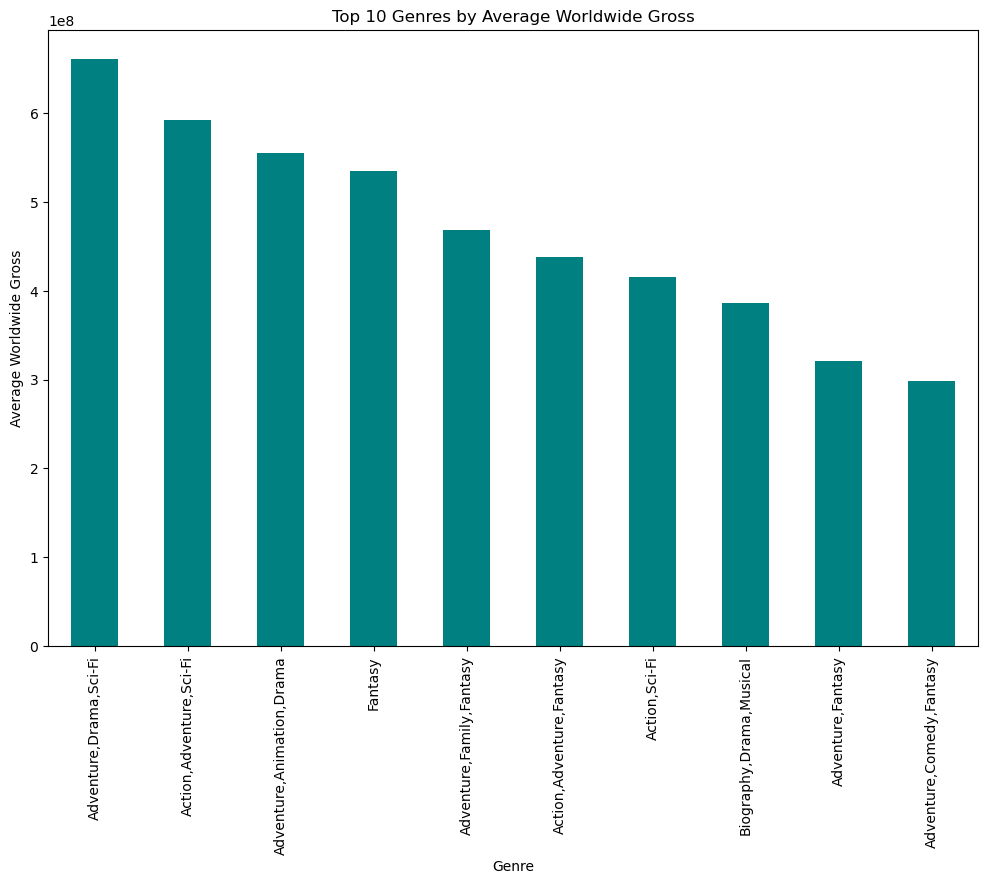

In [ ]:
# Getting a general idea of the higher grossing genres


genre_gross = movies_without_nan_profit.groupby('genres')['tn_worldwide_gross'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
genre_gross.plot(kind='bar', color='teal')
plt.title('Top 10 Genres by Average Worldwide Gross')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.show()

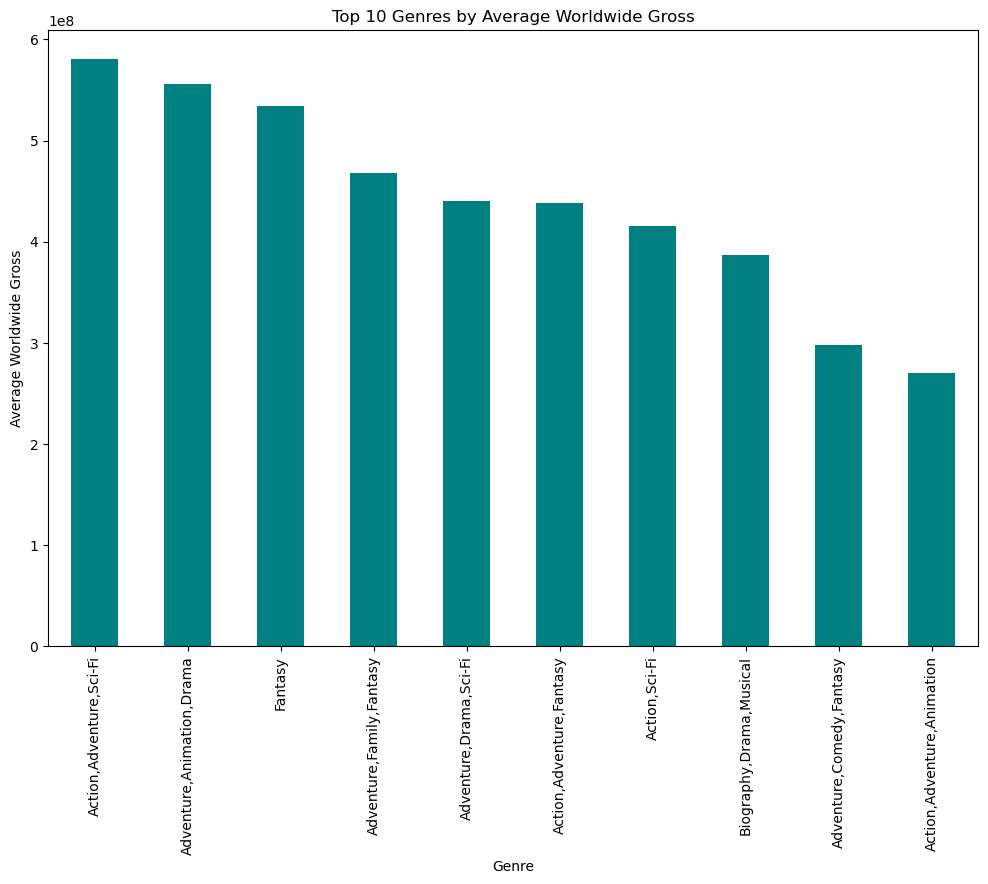

In [ ]:
# Getting a general idea of the higher grossing genres


genre_gross = movies_without_nan_profit.groupby('genres')['tn_worldwide_gross'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
genre_gross.plot(kind='bar', color='teal')
plt.title('Top 10 Genres by Average Worldwide Gross')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.show()